In [302]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### DATA EXPLORATION

In [303]:
df = pd.read_csv('/Users/athulnambiar/Desktop/PROJECTS/DL-YT/CUSTOMER CHURN PREDICTION- ANN/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [304]:
# CUSTOMER ID IS USELESS SO DROP IT

df.drop('customerID', axis='columns',inplace=True)

In [305]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [306]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [307]:
# TO CHECK THE PARTICULAR VALUE INDEX LOCK
df.iloc[490]

gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                     63
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                                No
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          104.8
TotalCharges                          6597.25
Churn                                      No
Name: 490, dtype: object

In [308]:
df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [309]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


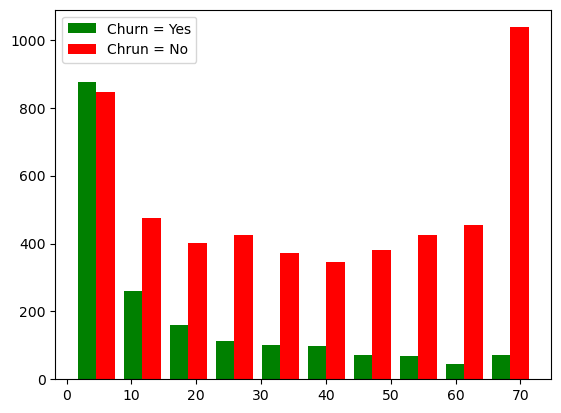

In [310]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'], label=['Churn = Yes','Chrun = No'])
plt.legend()

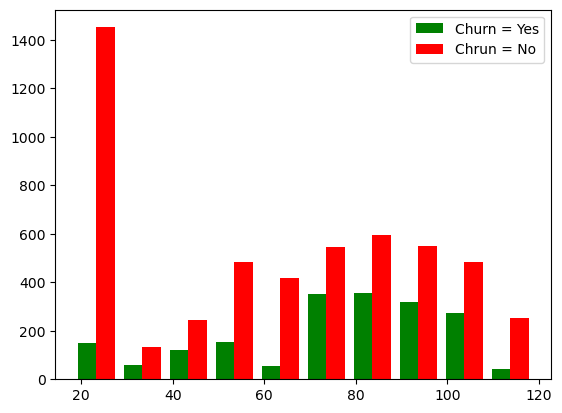

In [311]:
mc_tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_tenure_churn_yes,mc_tenure_churn_no], color=['green','red'], label=['Churn = Yes','Chrun = No'])
plt.legend()

In [312]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [313]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [314]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [315]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [316]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [317]:
# CHANGING YES NO VALUES WITH 1 / 0

yes_no_columns = ['Partner','Dependents','PhoneService',
                  'MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','Churn']

for item in yes_no_columns:
    df1[item].replace({'Yes' : 1 , 'No' : 0},inplace=True)

/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/866360241.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[item].replace({'Yes' : 1 , 'No' : 0},inplace=True)


In [318]:
for item in df1:
    print(f'{item}: {df1[item].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [319]:
df1.loc[:, 'gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/928930599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


In [320]:
df1['gender'].unique()

array([1, 0])

In [321]:
# ONE HOT ENCODING METHOD

df2 =pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df2.sample

<bound method NDFrame.sample of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines OnlineSecurity OnlineBackup DeviceProtection  ...  \
0     No phone service             No  

In [322]:
# Replace empty strings with NaN
df2.replace(' ', np.nan, inplace=True)

# Drop rows with missing values
df2.dropna(inplace=True)

# SCALING THE INT VALUES

col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [323]:
df2.loc[:, 'gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


In [324]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2909,1,0,No,No,0.591549,Yes,No,No,Yes,No,...,True,False,False,False,True,False,False,False,True,False
5573,1,1,No,No,0.000000,Yes,No,No,No,No,...,False,True,False,True,False,False,False,False,True,False
866,0,0,Yes,No,0.859155,No,No phone service,No,No,No,...,True,False,False,False,False,True,True,False,False,False
1322,1,0,Yes,No,0.126761,Yes,No,No internet service,No internet service,No internet service,...,False,False,True,True,False,False,True,False,False,False
6730,0,0,Yes,Yes,0.197183,Yes,No,No internet service,No internet service,No internet service,...,False,False,True,False,True,False,False,False,False,True


In [325]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Partner' is a categorical variable
label_encoder = LabelEncoder()
df1['Partner'] = label_encoder.fit_transform(df1['Partner'])


/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/407368851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Partner'] = label_encoder.fit_transform(df1['Partner'])


In [326]:
# Assuming df1 is your DataFrame
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

/var/folders/s_/5jg15_gj0fd3pndb4zhcc60m0000gn/T/ipykernel_45847/1682993025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


### TRAINING THE  MODEL


In [327]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [329]:
X_train.shape

(5625, 26)

In [330]:
X_test.shape

(1407, 26)

In [331]:
# Identify columns with string values
columns_with_strings = df.select_dtypes(include=['object']).columns

# Review unique values in each column
for column in columns_with_strings:
    print(f"Unique values in column '{column}': {df[column].unique()}")

# Handle remaining string values
# For example, you can encode categorical variables using label encoding or one-hot encoding


Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'PhoneService': ['No' 'Yes']
Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in column 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in column 'PaperlessBilling': ['Yes' 'No']
Unique values in column 'PaymentMethod': ['Electronic check' '

In [332]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                     'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaperlessBilling', 'PaymentMethod', 'Churn']

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [333]:
print(df.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


In [334]:
# Convert 'TotalCharges' to numeric data type, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for conversion errors
conversion_errors = df['TotalCharges'].isnull().sum()
if conversion_errors > 0:
    print(f"There were {conversion_errors} conversion errors in the 'TotalCharges' column.")

# If there are conversion errors, investigate and handle them as needed
# For example, you might replace NaN values or drop rows with conversion errors


There were 11 conversion errors in the 'TotalCharges' column.


In [335]:
# Replace NaN values with the mean of the column
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)


In [336]:
# Drop rows with NaN values in the 'TotalCharges' column
df.dropna(subset=['TotalCharges'], inplace=True)


In [337]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

/Users/athulnambiar/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: could not convert string to float: 'No'